In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import numpy as np

In [2]:
data = pd.read_csv("Data\\preguntas.csv", sep=',', encoding = "ISO-8859-1")
data.head(3)

,Pregunta,respuesta,Tema,Pers/empresa,Polarity
0,Hola una pregunta en que perjudica el acta de ...,NaN,Renuncia/Despido/Desahucio,persona,0
1,PARA CALCULAR EL DESAHUCIO SE DEBE TOMAR EN CU...,NaN,Renuncia/Despido/Desahucio,persona,0
2,supuestamente Correa emitió el decreto 225 dod...,NaN,Jubilacion Patronal,persona,0


In [3]:
data.Tema.value_counts()

Jubilacion Patronal                                    78
Renuncia/Despido/Desahucio                             22
IESS                                                   16
Greeting                                               10
Contacto                                               10
Otros servicios (Charlas/Capacitaciones/Financiera)     8
Consultoria                                             7
Ambiguous                                               6
job seeker                                              6
Queja                                                   5
Hi Five                                                 5
Otras Consultas                                         2
Name: Tema, dtype: int64

In [4]:
p2 = []
for p in data.Pregunta:
    p2.append(' '.join(p.split()))
data['Pregunta2'] = p2

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
import unidecode
from nltk.stem import SnowballStemmer

In [6]:
stop = stopwords.words('spanish')
tokenizer = RegexpTokenizer(r'\w+')
stemmer = SnowballStemmer("spanish")

In [7]:
stop = stop + ['hola', 'cuanto', 'cuesta', 'ustedes', 'buenas', 'tardes', 'favor', 'dias', 'necesito', 'buenos', 'si', 'saber', 'gracias', 'ayudar', 
     '2017', '2018', '2016', '2019', 'ayuden', 'consulta', 'podria', 'pregunta', 'realizar', 'puede', 'pueden', 'mas', 'debe', 'tomar',
         'supuestamente', 'buen', 'par', 'com', 'sab', 'hol', 'pregunt', 'tard', 'ayud']  #For topics!!! (for other actions it may be different)

In [8]:
topicjp = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Jubilacion Patronal']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicjp[w]+=1 

In [9]:
for w in sorted(topicjp, key=topicjp.get, reverse=True):
    print(w, topicjp[w])

actuarial 37
jubilacion 32
estudi 30
patronal 25
anos 23
necesit 18
servici 17
empres 17
cotizacion 16
calcul 15
trabaj 15
teng 13
pued 13
podri 9
graci 8
consult 8
solicit 8
jubil 8
cuant 8
realiz 8
estim 7
hac 7
cost 7
indic 7
envi 7
per 6
deb 6
tas 6
provision 5
emple 5
sobr 5
mes 5
person 5
dia 5
som 5
desahuci 5
corre 4
mism 4
edad 4
proporcional 4
derech 4
desd 4
dos 4
oblig 4
quis 4
usted 4
compani 4
20 3
posibil 3
dese 3
part 3
nuestr 3
40 3
educ 3
actual 3
contrat 3
ser 3
descuent 3
daniel 3
salud 3
tien 3
4 3
pension 3
quier 3
cumpl 3
queri 3
pas 3
moment 3
cuent 3
much 3
recib 3
tem 3
uds 3
requier 3
inform 3
respuest 3
niif 3
s 3
dentr 3
ec 3
ecuador 3
aproxim 3
ano 3
nad 3
decret 2
perdi 2
aport 2
solicitud 2
suspens 2
signif 2
explic 2
personal 2
valor 2
pag 2
desp 2
22 2
institucion 2
efect 2
dependent 2
fundacion 2
despu 2
public 2
modal 2
regim 2
dond 2
30 2
cuand 2
60 2
seri 2
contabl 2
espoch 2
losep 2
tiemp 2
entreg 2
domest 2
nosotr 2
disculp 2
bas 2
legal 2
inform

In [10]:
topicjp = ['actuarial', 'jubilacion', 'estudi', 'patronal', 'empres', 'calcul', 'trabaj', 'jubil', 
     'provision', 'emple', 'desahuci', 'aport', 'proporcional', 'descuent', 'pension', 'niif', 'nec']

In [11]:
topicRen = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Renuncia/Despido/Desahucio']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicRen[w]+=1 

In [12]:
for w in sorted(topicRen, key=topicRen.get, reverse=True):
    print(w, topicRen[w])

desp 8
desahuci 7
liquidacion 6
calcul 6
valor 5
renunci 4
intempest 4
acta 3
finiquit 3
quier 3
anos 3
jubilacion 3
emple 3
cuant 3
person 3
perjud 2
deb 2
cuent 2
consult 2
teng 2
empres 2
q 2
hac 2
trabaj 2
salari 2
cargolin 2
actuarial 2
pued 2
1 2
cuand 2
basic 2
sol 2
requier 2
bonificacion 2
formul 2
podri 2
tom 1
hor 1
extras 1
alimentacion 1
direct 1
misniteri 1
derech 1
60 1
vacacion 1
acumul 1
deses 1
motiv 1
usted 1
ued 1
nuestr 1
patron 1
cerr 1
per 1
dic 1
pong 1
cond 1
enqu 1
xq 1
signif 1
segur 1
seri 1
cancel 1
tiemp 1
servici 1
cinc 1
ultim 1
375 1
ggarofal 1
ec 1
gardeni 1
garofal 1
ecuador 1
s 1
indic 1
cost 1
estimacion 1
4 1
algun 1
tip 1
descuent 1
ilegal 1
quis 1
dier 1
voluntari 1
amo 1
2 1
deposit 1
diner 1
hiz 1
bancari 1
8 1
sueld 1
deberi 1
resiv 1
cons 1
desausi 1
ten 1
conserj 1
desd 1
2000 1
cobr 1
evalu 1
ano 1
19 1
tien 1
20 1
mejor 1
esper 1
6 1
gustari 1
respect 1
ayudenm 1
ineficaz 1
embaraz 1
discapac 1
porfavor 1
inquietud 1
moment 1
compani 1
rea

In [13]:
topicRen = ['desp', 'desahuci', 'liquidacion', 'calcul', 'valor', 'renunci', 'intempest', 'acta', 
     'finiquit', 'jubilacion', 'emple', 'empres', 'actuarial', 'bonificacion', 'tiemp']

In [14]:
topicIESS = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'IESS']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicIESS[w]+=1 

In [15]:
for w in sorted(topicIESS, key=topicIESS.get, reverse=True):
    print(w, topicIESS[w])

aport 11
anos 9
teng 9
iess 5
calcul 5
jubil 5
jubilacion 4
podri 4
consult 3
cuant 3
indic 3
raiz 3
sesentav 3
deb 3
deberi 3
edad 3
per 3
pag 3
trabaj 3
seri 3
cuand 2
20 2
actual 2
diciembr 2
cumplir 2
360 2
imposicion 2
60 2
sac 2
nuev 2
person 2
tien 2
ayudem 2
invalidez 2
400 2
segu 2
q 2
62 2
aportacion 2
graci 2
montepi 2
hag 2
sobr 2
anterior 2
965 2
73 2
afili 1
voluntari 1
viv 1
usa 1
vivi 1
ecuador 1
59 1
342 1
2020 1
juni 1
trat 1
ver 1
toc 1
pued 1
obten 1
mejor 1
ayudam 1
necesit 1
realiz 1
mla 1
proyeccion 1
men 1
40 1
pension 1
7600 1
espos 1
total 1
absolut 1
tip 1
indemnizacion 1
ten 1
fond 1
retir 1
dud 1
mes 1
57 1
45 1
discapac 1
coeficient 1
aplic 1
300 1
proced 1
just 1
som 1
grup 1
estan 1
estam 1
pel 1
4 1
nadi 1
respond 1
siempr 1
algun 1
pretext 1
eram 1
codig 1
ley 1
document 1
respald 1
aquell 1
hac 1
cas 1
x 1
8 1
faltari 1
ano 1
352 1
coj 1
juvilacion 1
octubr 1
cunpl 1
lad 1
imposicipn 1
inform 1
recib 1
cumpl 1
tal 1
vez 1
derech 1
solicit 1
reliquidac

In [16]:
topicIESS = ['aport', 'iess', 'jubil', 'trabaj', 'jubilacion', 'calcul', 
     'raiz', 'sesentav', 'imposicion', 'invalidez', 'aportacion', 'montepi']

In [17]:
topiContacto = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Contacto']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topiContacto[w]+=1 

In [18]:
for w in sorted(topiContacto, key=topiContacto.get, reverse=True):
    print(w, topiContacto[w])

corre 4
guayaquil 4
envi 2
pued 2
electron 2
retencion 2
direccion 2
nombr 1
oscar 1
castr 1
ayer 1
llam 1
empres 1
solict 1
habl 1
sr 1
rodrig 1
ibarr 1
senal 1
intent 1
hoy 1
manan 1
posibl 1
contact 1
telefonicamet 1
salud 1
miguel 1
zamor 1
acab 1
ventas3 1
lea 1
contest 1
graci 1
numer 1
telefon 1
dia 1
ayudari 1
gener 1
dan 1
asesori 1
quit 1
dond 1
estan 1
ubic 1
gye 1
necesit 1
realiz 1
transferent 1
pag 1
factur 1
ayudem 1
dat 1
quier 1
prest 1
servici 1
ciud 1
actuari 1


In [19]:
topiContacto = ['corre', 'guayaquil', 'envi', 'electron', 'retencion', 'direccion', 'contact', 'contactari',
     'telefonicamet', 'ciud', 'actuari', 'gye', 'quit', 'ubic', 'estan', 'contest', 'empres', 'transferent', 'factur']

In [20]:
topicOS = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Otros servicios (Charlas/Capacitaciones/Financiera)']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicOS[w]+=1 

In [21]:
for w in sorted(topicOS, key=topicOS.get, reverse=True):
    print(w, topicOS[w])

capacit 4
quis 3
fech 2
tien 2
human 2
laboral 2
algun 2
usted 2
financ 2
sobr 2
nombr 1
luz 1
lopez 1
grupok 1
s 1
interes 1
asist 1
charl 1
dia 1
18 1
06 1
per 1
veo 1
cup 1
lastim 1
demor 1
porqu 1
solicit 1
autorizacion 1
gerent 1
contest 1
pront 1
graci 1
consult 1
talent 1
gustari 1
capacitacion 1
vigent 1
respect 1
legislacion 1
oblig 1
societari 1
afin 1
dan 1
asesori 1
pymes 1
pued 1
informacion 1
sgur 1
poc 1
gestion 1
podri 1
inform 1
especial 1
q 1
otorg 1
ten 1
conoc 1
actuari 1
pod 1
desempen 1
carg 1
ingen 1


In [22]:
topicOS = ['capacit', 'laboral', 'financ', 'human', 'charl', 'cup']

In [23]:
topiCons = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'Consultoria']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topiCons[w]+=1 

In [24]:
for w in sorted(topiCons, key=topiCons.get, reverse=True):
    print(w, topiCons[w])

sobr 2
necesit 2
product 2
podri 2
realiz 2
cuant 2
cuest 2
not 2
tecnic 2
daniel 1
escrib 1
desd 1
mexic 1
mir 1
llev 1
cab 1
investigacion 1
requisit 1
actuari 1
registr 1
segur 1
gui 1
poc 1
consult 1
porcentaj 1
rrc 1
aplic 1
period 1
q 1
rig 1
part 1
abril 1
explic 1
tem 1
machin 1
learning 1
dav 1
subi 1
r 1
plan 1
aut 1
conec 1
salud 1
quis 1
usted 1
evalu 1
360 1
vend 1
consultori 1


In [25]:
topiCons = ['not', 'tecnic', 'actuari', 'machin', 'learning', 'evalu', '360', 'consultori', 'rrc', 'segur']

In [26]:
topicJS = defaultdict(int)
lista = data.Pregunta2[data.Tema == 'job seeker']
for frase in lista:
    tokens = tokenizer.tokenize(unidecode.unidecode(frase.lower()))
    for w in tokens:
        w = stemmer.stem(w)
        if w not in stop:
            topicJS[w]+=1 

In [27]:
for w in sorted(topicJS, key=topicJS.get, reverse=True):
    print(w, topicJS[w])

envi 4
hoj 2
vid 2
cv 2
q 1
deb 1
hac 1
gan 1
entrev 1
trabaj 1
podri 1
corre 1
electron 1
acab 1
ver 1
pued 1
form 1
part 1
equip 1
gustari 1
estan 1
necesit 1
personal 1
oportun 1
laboral 1
quis 1
consider 1


In [28]:
topicJS = ['hoj', 'vid', 'cv', 'entrev', 'trabaj', 'personal', 'oportun', 'laboral']

In [29]:
topics = {}
topics['JP'] = topicjp
topics['Ren'] = topicRen
topics['IESS'] = topicIESS
topics['Cont'] = topiContacto
topics['OS'] = topicOS
topics['Cons'] = topiCons
topics['JS'] = topicJS

In [30]:
topicLik = defaultdict(list)
for frase,tema in zip(data.Pregunta2, data.Tema):    
    for w in tokenizer.tokenize(unidecode.unidecode(frase.lower())):
        w = stemmer.stem(w)
        if w not in stop:
            topicLik[w].append(tema)  
topicLik

defaultdict(list,
            {'perjud': ['Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio'],
             'acta': ['Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio'],
             'finiquit': ['Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio'],
             'liquidacion': ['Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio',
              'Renuncia/Despido/Desahucio',
              'Jubilacion Patronal',
              'Renuncia/Despido/Desahucio'],
             'calcul': ['Renuncia/Despido/Desahucio',
              'IESS',
              'IESS',
              'Jubilacion Patronal',
              'Renuncia/Despido/Desahucio',
              'IESS',
              'Jubilacion Patronal',
              'Jubilacion Patronal',
     

In [31]:
liktopics = {}
tops = ['Jubilacion Patronal', 'Renuncia/Despido/Desahucio', 'IESS', 'Contacto', 
            'Otros servicios (Charlas/Capacitaciones/Financiera)', 'Consultoria', 'job seeker']
for k,t in zip(topics.keys(), tops):
    l = []
    for w in topics[k]:        
        lik = topicLik[w].count(t)/len(topicLik[w])
        l.append(lik)
    liktopics[k] = l
liktopics

{'JP': [0.9487179487179487,
  0.8205128205128205,
  0.967741935483871,
  1.0,
  0.7391304347826086,
  0.5769230769230769,
  0.7142857142857143,
  0.6153846153846154,
  0.8333333333333334,
  0.625,
  0.4166666666666667,
  0.15384615384615385,
  1.0,
  0.75,
  0.75,
  1.0,
  1.0],
 'Ren': [0.8,
  0.5833333333333334,
  0.8571428571428571,
  0.23076923076923078,
  0.625,
  0.8,
  1.0,
  1.0,
  1.0,
  0.07692307692307693,
  0.375,
  0.08695652173913043,
  0.05128205128205128,
  1.0,
  0.3333333333333333],
 'IESS': [0.8461538461538461,
  1.0,
  0.38461538461538464,
  0.14285714285714285,
  0.10256410256410256,
  0.19230769230769232,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'Cont': [0.4444444444444444,
  0.8,
  0.15384615384615385,
  0.6666666666666666,
  1.0,
  1.0,
  0.5,
  0.0,
  1.0,
  0.5,
  0.125,
  1.0,
  1.0,
  0.5,
  0.25,
  0.3333333333333333,
  0.043478260869565216,
  1.0,
  1.0],
 'OS': [1.0, 0.5, 1.0, 1.0, 1.0, 1.0],
 'Cons': [1.0, 1.0, 0.125, 1.0, 1.0, 0.5, 0.3333333333333333

In [122]:
all_topics = topicjp +  topicRen + topicIESS + topiContacto + topicOS + topiCons +  topicJS
#all_topics = list(set(all_topics))

In [123]:
all_topics = topicjp
for t in topicRen:
    if t not in all_topics:
        all_topics.append(t)
    for t in topicIESS:
        if t not in all_topics:
            all_topics.append(t)
        for t in topiContacto:
            if t not in all_topics:
                all_topics.append(t)
            for t in topicOS:
                if t not in all_topics:
                    all_topics.append(t)
                for t in topiCons:
                    if t not in all_topics:
                        all_topics.append(t)
                    for t in topicJS:
                        if t not in all_topics:
                            all_topics.append(t)

In [124]:
jbtopdict = {}
t = 'Jubilacion Patronal'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    jbtopdict[w] = lik

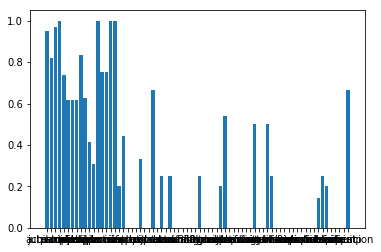

In [125]:
fig, ax = plt.subplots()
plt.bar(jbtopdict.keys(), jbtopdict.values())
plt.show()

In [126]:
rentopdict = {}
t = 'Renuncia/Despido/Desahucio'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    rentopdict[w] = lik

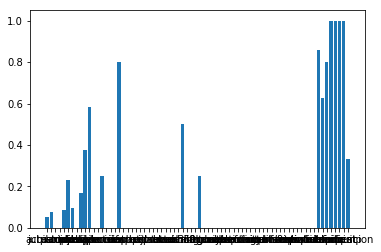

In [127]:
fig, ax = plt.subplots()
plt.bar(rentopdict.keys(), rentopdict.values())
plt.show()

In [128]:
IESStopdict = {}
t = 'IESS'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    IESStopdict[w] = lik

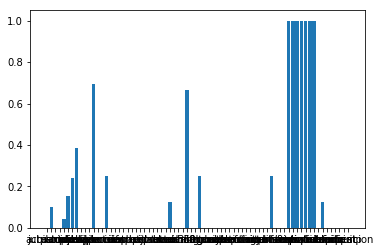

In [129]:
fig, ax = plt.subplots()
plt.bar(IESStopdict.keys(), IESStopdict.values())
plt.show()

In [130]:
CONTtopdict = {}
t = 'Contacto'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    CONTtopdict[w] = lik

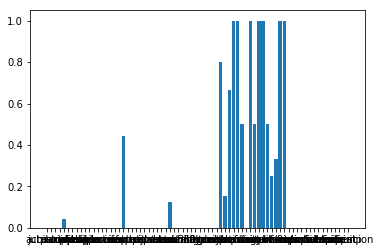

In [131]:
fig, ax = plt.subplots()
plt.bar(CONTtopdict.keys(), CONTtopdict.values())
plt.show()

In [132]:
OStopdict = {}
t = 'Otros servicios (Charlas/Capacitaciones/Financiera)'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    OStopdict[w] = lik

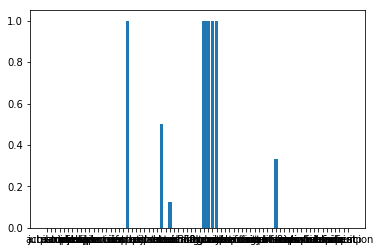

In [133]:
fig, ax = plt.subplots()
plt.bar(OStopdict.keys(), OStopdict.values())
plt.show()

In [134]:
CONStopdict = {}
t = 'Consultoria'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    CONStopdict[w] = lik

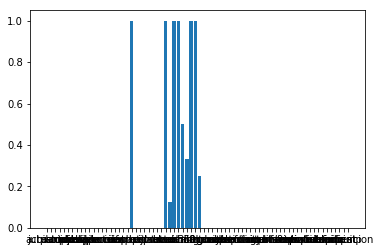

In [135]:
fig, ax = plt.subplots()
plt.bar(CONStopdict.keys(), CONStopdict.values())
plt.show()

In [136]:
JStopdict = {}
t = 'job seeker'
for w in all_topics:        
    lik = topicLik[w].count(t)/len(topicLik[w])
    JStopdict[w] = lik

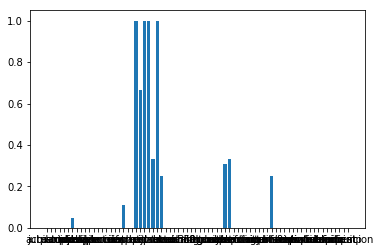

In [137]:
fig, ax = plt.subplots()
plt.bar(JStopdict.keys(), JStopdict.values())
plt.show()

In [138]:
np.save('Data\\jbtopdict.npy', jbtopdict) ; np.save('Data\\rentopdict.npy', rentopdict) ; 
np.save('Data\\IESStopdict.npy', IESStopdict) ; np.save('Data\\CONTtopdict.npy', CONTtopdict) ; 
np.save('Data\\OStopdict.npy', OStopdict) ; np.save('Data\\CONStopdict.npy', CONStopdict) ;
np.save('Data\\JStopdict.npy', JStopdict) 

In [ ]:
https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/?completed=/stemming-nltk-tutorial/

In [ ]:
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [ ]:
The likelihodd should be for word w, if occurrs, in what percentage of the topics where w occurss belong to class k
 